# Support Vector Machines

## Packages

In [30]:
#Import necessary libraries
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Dataset

In [32]:
# Load the dataset
spambase = fetch_ucirepo(id=94)

# Separate the features and targets
X = spambase.data.features
y = spambase.data.targets

# Print metadata
print(spambase.metadata)
# Print variable information
print(spambase.variables)

# Convert to numpy arrays
X = X.values
y = y.values

# Convert target to 1-D array
y = np.ravel(y)

# Normalize features using mean-variance normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

## Part A: SVM Implementation

In [34]:
# Initialize a list to store results for different 'C' values
results = []

# Vary the regularization parameter 'C'
for C in [0.001, 0.1, 1, 10, 100]:
    # Create an SVM model with a linear kernel
    svm_model = SVC(kernel='linear', C=C)
    
    # Train the SVM model on the training data
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy 
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    # Store the results
    results.append((C, accuracy, precision, recall, f1_score))

# Tabulate and print the results for different 'C' values
print("{:^30} |{:^12}|{:^12}|{:^12}|{:^12}".format("Regularization Parameter (C)", "Accuracy", "Precision", "Recall", "F1-Score"))
for C, accuracy, precision, recall, f1_score in results:
    print("{:^30} |{:^12.4f}|{:^12.4f}|{:^12.4f}|{:^12.4f}".format(C, accuracy, precision, recall, f1_score))

 Regularization Parameter (C)  |  Accuracy  | Precision  |   Recall   |  F1-Score  
            0.001              |   0.8903   |   0.9419   |   0.7897   |   0.8591   
             0.1               |   0.9218   |   0.9368   |   0.8744   |   0.9045   
              1                |   0.9251   |   0.9350   |   0.8846   |   0.9091   
              10               |   0.9229   |   0.9299   |   0.8846   |   0.9067   
             100               |   0.9207   |   0.9295   |   0.8795   |   0.9038   


From these results, we can infer that:
- Accuracy: 
    As 'C' increases from 0.001 to 1, the accuracy steadily increases. However, when 'C' becomes 10 and 100, the accuracy starts to decrease slightly. This suggests that a moderate 'C' value around 1 provides the best trade-off between bias and variance in the model.
- Precision: 
    As 'C' increases from 0.001 to 100, the precision steadily decreases. This suggests that the model is becoming less strict in classifying positive cases (i.e., spam emails) and is allowing more false positives.
- Recall: 
    When recall steadily increases as 'C' increases from 0.001 to 1, it indicates that the model is becoming more effective at capturing true positive cases (i.e., spam emails). The stagnation of recall as 'C' changes from 1 to 10 suggests that this might be an optimal point where the model achieves a balance between precision and recall. A decrease in recall as 'C' increases to 100 indicates that the model is becoming less effective at capturing true positive cases, leading to more false positives or non-spam emails being incorrectly classified as spam.
- F-1 Score: 
    The increase in the F1-score as 'C' changes from 0.001 to 0.1 indicates that the model is achieving a better balance between precision and recall, becoming more accurate in classifying both positive and negative cases. As the F1-score remains roughly constant as 'C' changes from 0.1 to 100, it suggests that the model has reached a point of stability in terms of its overall performance.

Overall, the model performs best for a moderate value of the regularisation parameter ('C' = 1), indicating that a moderate-margin hyperplane does a better job of getting all the training points classified correctly. 

## Part B: Kernel Tricks

In [36]:
# Initialize a list to store results for different kernels
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, None, None]
kernel_results = []

In [37]:
# Vary the regularization parameter 'C'
for kernel, degree in zip(kernels, degrees):
    if kernel == 'poly':
        # Polynomial kernel with specified degree
        svm_model = SVC(kernel=kernel, degree=degree, C=1)
    else:
        # Other kernels (Sigmoid and RBF)
        svm_model = SVC(kernel=kernel, C=1)
    
    # Train the SVM model with the selected kernel on the training data
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, and F1-score
    report_2 = classification_report(y_test, y_pred, output_dict=True)
    precision = report_2['1']['precision']
    recall = report_2['1']['recall']
    f1_score = report_2['1']['f1-score']
    
    # Store the results
    kernel_results.append((kernel, degree, accuracy, precision, recall, f1_score))

In [38]:
# Tabulate and print the results for different kernels
print("{:^12}|{:^12}|{:^12}|{:^12}|{:^12}|{:^12}".format("Kernel", "Degree", "Accuracy", "Precision", "Recall", "F1-Score"))
for kernel, degree, accuracy, precision, recall, f1_score in kernel_results:
    if degree is None:
        degree_str = "N/A"
    else:
        degree_str = str(degree)
    print("{:^12}|{:^12}|{:^12.4f}|{:^12.4f}|{:^12.4f}|{:^12.4f}".format(kernel, degree_str, accuracy, precision, recall, f1_score))

   Kernel   |   Degree   |  Accuracy  | Precision  |   Recall   |  F1-Score  
    poly    |     2      |   0.8393   |   0.9515   |   0.6538   |   0.7751   
    poly    |     3      |   0.7644   |   0.9436   |   0.4718   |   0.6291   
  sigmoid   |    N/A     |   0.8893   |   0.8850   |   0.8487   |   0.8665   
    rbf     |    N/A     |   0.9349   |   0.9508   |   0.8923   |   0.9206   


These results indicate that:
- RBF: The RBF kernel performs the best among the tested configurations, providing a high level of accuracy, precision, and recall.
- Sigmoid: The sigmoid kernel achieves a good balance between precision and recall, however it performs poorly in comparision to the RBF kernel. 
- Polynomial: Polynomial kernels with higher degrees (e.g., degree 3) tend to have lower recall and, as a result, lower F1-Scores. Overall, polynomial kernels have poor recall and, as a result, lower F-1 scores, indicating that they are less effective in capturing all positive cases.

## Part C: Overfitting & Underfitting Analysis

In [39]:
# Initialize a list to store results for different experiments
experiments = [
    (1, 0.01),
    (1, 1),
    (1, 100),
    (2, 0.01),
    (2, 1),
    (2, 100),
    (3, 0.01),
    (3, 1),
    (3, 100)
]
experiment_results = []

In [40]:
for (degree, C) in experiments:
    # Train SVM models with different polynomial degrees and 'C' values
    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)
    
    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results
    experiment_results.append((degree, C, train_accuracy, test_accuracy))

# Tabulate and plot the results for different experiments
print("{:^12}| {:^30} |{:^20}|{:^20}".format("Degree", "Regularization Parameter (C)", "Train Accuracy", "Test Accuracy"))
for degree, C, train_accuracy, test_accuracy in experiment_results:
    print("{:^12}| {:^30} |{:^20.4f}|{:^20.4f}".format(degree, C, train_accuracy, test_accuracy))

   Degree   |  Regularization Parameter (C)  |   Train Accuracy   |   Test Accuracy    
     1      |              0.01              |       0.8117       |       0.7959       
     1      |               1                |       0.9258       |       0.9175       
     1      |              100               |       0.9318       |       0.9273       
     2      |              0.01              |       0.6364       |       0.6059       
     2      |               1                |       0.8614       |       0.8393       
     2      |              100               |       0.9696       |       0.9316       
     3      |              0.01              |       0.6418       |       0.6113       
     3      |               1                |       0.8000       |       0.7644       
     3      |              100               |       0.9622       |       0.9240       


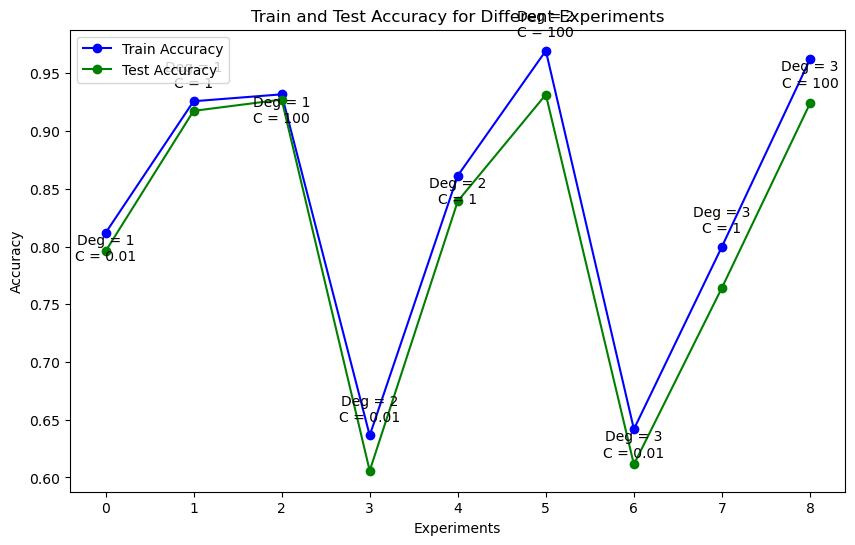

In [41]:
# Plot train and test accuracy for different experiments
degrees, C_values, train_accuracies, test_accuracies = zip(*experiment_results)
plt.figure(figsize=(10, 6))
plt.plot(range(len(experiments)), train_accuracies, 'b', label="Train Accuracy", marker='o')
plt.plot(range(len(experiments)), test_accuracies, 'g', label="Test Accuracy", marker='o')
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for Different Experiments")

# Annotate data points with degree and C values
for i, (d, C) in enumerate(experiments):
    label = f"Deg = {d}\nC = {C}"
    x_offset = 0
    y_offset = 10
    if i % 2 == 0:  # Shift every other annotation slightly
        x_offset = 0
        y_offset = -20
    plt.annotate(label, (i, train_accuracies[i]), textcoords="offset points", xytext=(x_offset, y_offset), ha='center')

plt.legend()
plt.show()

From these results, we can infer that:
- Degree 1: 
    - For degree 1, as 'C' increases from 0.01 to 1 to 100, both training and testing accuracy increase.
    - This suggests that for degree 1, regularization parameters around 1 provide a good balance between model complexity and accuracy.
    - The model is not overfitting the data, and it generalizes well to the test dataset, as indicated by similar training and testing accuracies.
- Degree 2:
    - For degree 2, the behavior is more pronounced. As 'C' increases, training and test accuracy improve significantly.
    - This indicates that as 'C' increases, the model chooses a smaller-margin hyperplane since that hyperplane does a better job of getting all the datapoints classified correctly.
- Degree 3:
    - For degree 3, the results follow a pattern similar to degree 2, however, the model's performance is poorer in general, indicating that model becomes overly complex.

In summary, the results suggest that for this dataset, the polynomial kernel with degree 2 with a high 'C' value demonstrates the best overall performance. The polynomial kernel with degree 1 performs well for a range of regularization parameter values from 1 to 100. It's a robust choice for this classification task and offers good performance without becoming overly complex. Polynomial kernels with degrees 2 and 3 both show a similar pattern of performance improvement as the regularization parameter 'C' increases.